
# **Oral Cancer Detection using deep learning**
 

Deep Learning : Deep Learning is a subset of Machine Learning, which on the other hand is a subset of Artificial Intelligence. Artificial Intelligence is a general term that refers to techniques that enable computers to mimic human behavior.

Problem Statement : 
Using deep learning algorithm to do multi classification model which will predict different types of Skin cancer named
1. CancerImg
2. NonCancerImg
3. NormalHistopathologic
4. OSCCHistopathologic


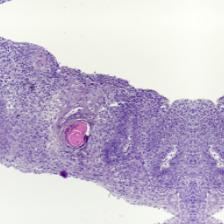
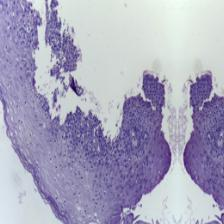

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 kB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19188 sha256=282979b76c6fed9e8c9beb80a2c3aacd4b96074c5421292455809332e0cca1e3
  Stored in directory: /root/.cache/pip/wheels/f6/d8/b0/15cfd7805d39250ac29318105f09b1750683387630d68423e1
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.12
    Uninstalling fastai-2.7.12:
      Successfully uninstalled fastai-2.7.12


In [3]:
!pip install torchvision==0.10.1 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.4/831.4 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.9.1+cu102 which is incompatible.
torchdata 0.6.0 requires torch==2.0.

In [4]:
!pip install torch==1.9.0 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.4/831.4 MB 1.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1+cu102
    Uninstalling torch-1.9.1+cu102:
      Successfully uninstalled torch-1.9.1+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.1+cu102 requires torch==1.9.1, but you have torch 1.9.0+cu102 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.9.0+cu102 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.9.0+cu102 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.9.0+cu102 which is incompatible.


In [5]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate

**Path to Dataset directory**

In [6]:
#testing
path = Path('/content/drive/MyDrive/OralCancer/FinalDatasetOral/OralCancer')

**Deleting corrupted images from the dataset**


In [7]:
#deleting corrupted images'
classes = ['CancerImg','NonCancerImg','NormalHistopathologic','OSCCHistopathologic']

for c in classes:
  print(c)
  verify_images(path/c, delete = True,  max_size = 100)

CancerImg


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


NonCancerImg


NormalHistopathologic


OSCCHistopathologic


Image transformation is a key step in training a model for images. It is also referred to as data augmentation. To avoid overfitting the model image transformation is a must. There are different ways to transform images such as resizing, cropping, squishing, and padding. However, squishing and padding robs the original information from the images and adds additional pixels respectively. Hence, randomly resizing the images yields good results.

**Data augmentation :**
In the below step dividing the dataset on 80-20% fashion named as valid_pct, using get_transforms function to resize all the images to 224 dimension.

In [8]:
#view data
data = ImageDataBunch. from_folder(path, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)


/usr/local/lib/python3.9/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


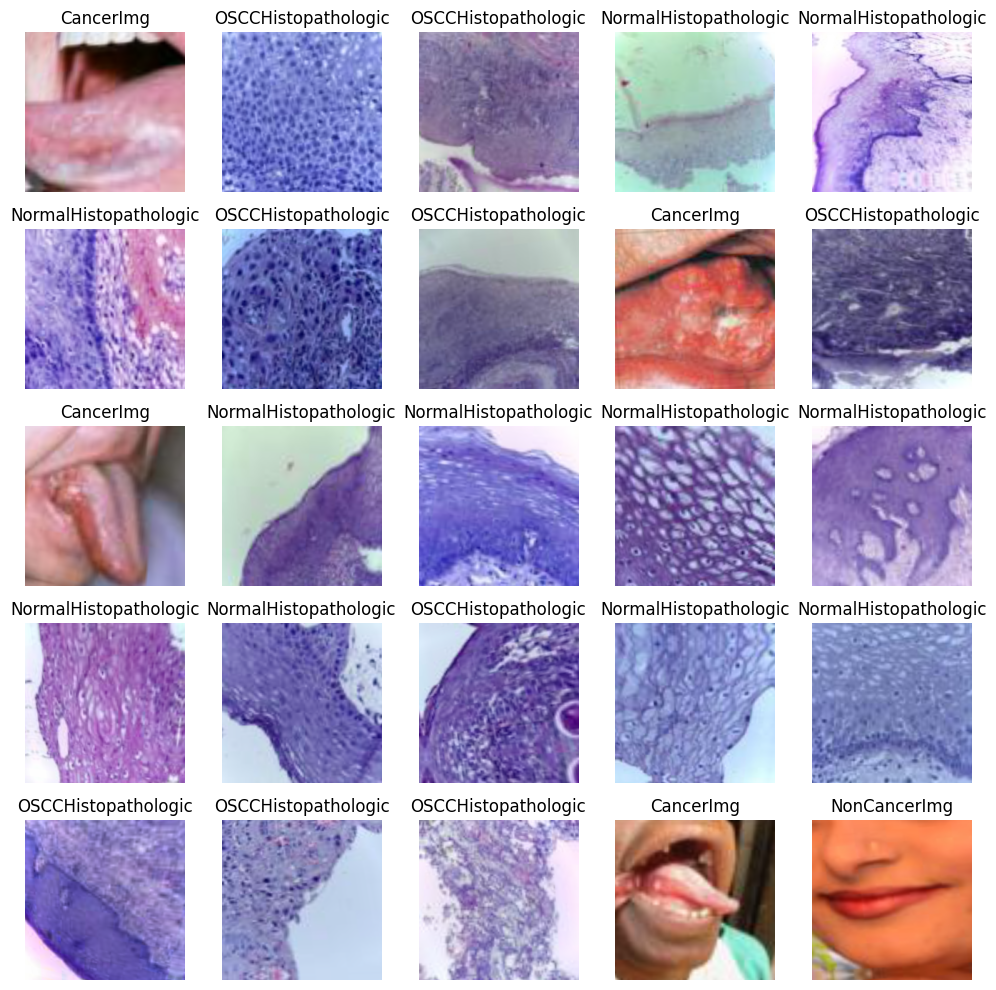

In [9]:
data.show_batch(rows = 5, figsize = (10,10))

**Total Count of Train and validation dataset**

The total number which is displayed below are the total count of train and validation dataset

In [10]:
import torch
print(torch.__version__)

1.9.0+cu102


In [11]:
import fastai
print(fastai.__version__)

1.0.61


In [12]:
#print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

2496
623


**Vgg16 deep learning algorithm implementation**

Description : VGG16 is a convolutional neural network model proposed by K. ... Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”.

Load the pre-trained weights of vgg16 model to train our model
below step we are loading the vgg16 model for training the data

For training this image dataset a pre-trained CNN model is used. This approach is known as transfer learning. Jeremy recommends using pre-trained models for faster training and better accuracy. This is especially applicable to computer vision problems

In [15]:
#keras 
learn = cnn_learner(data, models.vgg16_bn,metrics=[accuracy, error_rate])


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

**Model Training Phase**

**Training process**
The cycle is training the model through one complete cycle traversing through complete Convolutional Neural Network layers
1. epoch is total number of cycles







In [16]:
#using vgg19 algorithm/Model
learn.fit_one_cycle(6,3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.374645,0.540443,0.776886,0.223114,00:33
1,0.906491,0.386637,0.857143,0.142857,00:34
2,0.632082,0.296016,0.865169,0.134831,00:33
3,0.471058,0.250695,0.889246,0.110754,00:34
4,0.361895,0.205732,0.911717,0.088283,00:36
5,0.295720,0.200665,0.916533,0.083467,00:33


In [19]:
learn = cnn_learner(data, models.resnet50,metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [20]:
learn.fit_one_cycle(6,3e-3)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.132311,0.718696,0.780096,0.219904,00:31
1,0.737063,0.483740,0.844302,0.155698,00:30
2,0.504827,0.277695,0.908507,0.091493,00:30
3,0.380153,0.140159,0.939005,0.060995,00:30
4,0.261875,0.132717,0.947030,0.052970,00:30
5,0.202779,0.128142,0.945425,0.054575,00:30


Plot Confusion matrix

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

Confusion matrix for vgg16

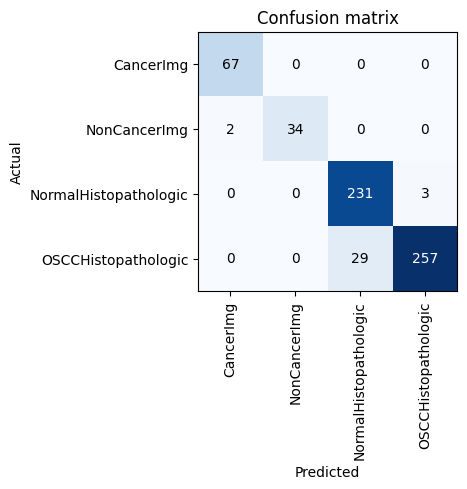

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
#losses,idxs = interp.top_losses()
#len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix()

Confusion matrix for vgg16 below

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-05
Min loss divided by 10: 2.75E-07


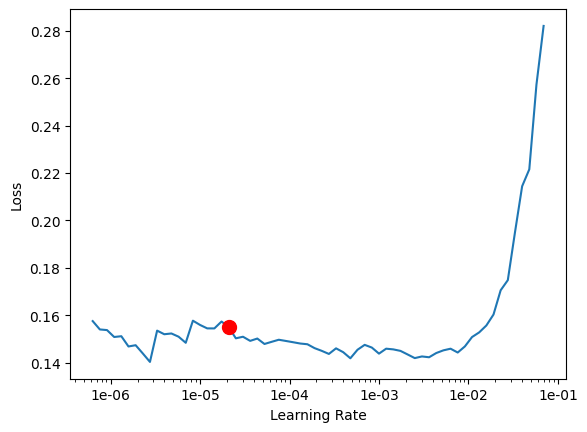

In [22]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

The above graph basically says the learning rate which is increasing fasion 

**Saving/exporting the trained model as export.pkl**

Once you have trained the model and satisfied with the outcome, its time to deploy the model. For deploying the model into production you need to save your model architecture and the parameters it’s trained on. For this, the export method is used. The exported model is saved as a PKL file, which is a file created by pickle (a Python module).

In [23]:
learn.export() #export file export.pkl 

**Testing phase **
Opening an image

**Load The Trained model named export.pkl for testing**

Load the model which have been exported named export.pkl
export.pkl is like mathematical equation the model is trained already no need to train again and again just feed input it will give you an output

In [24]:
print(path)
learn = load_learner(path)

/content/drive/MyDrive/OralCancer/FinalDatasetOral/OralCancer


**Testing Phase**

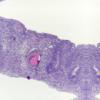

In [29]:
img = open_image('/content/drive/MyDrive/OralCancer/FinalDatasetOral/OralCancer/OSCCHistopathologic/aug_0_3486.jpg')
img

**Prediction phase**

In this Phase above input image will be read and feed to a trained model which will predict the index value or the 6 class prediction

In [31]:
pred,idx,outputs = learn.predict(img)
print(pred)
result=int(pred)
print(result)
print(idx)
print(outputs)
print(f"Probability it's: {outputs[result]:.4f}")

OSCCHistopathologic
3
tensor(3)
tensor([2.8755e-04, 1.7956e-04, 2.2203e-03, 9.9731e-01])
Probability it's: 0.9973
